## Describe_Clustering_Model

## Descriptivo

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\pandr\OneDrive\Escritorio\Transport\data_clean_transport.csv")


array([[<Axes: title={'center': 'CANTIDAD'}>,
        <Axes: title={'center': 'FECHASALIDACARGUE'}>,
        <Axes: title={'center': 'FECHALLEGADADESCARGUE'}>],
       [<Axes: title={'center': 'HORAS_VIAJE'}>,
        <Axes: title={'center': 'HORAS_ESPERA_CARGUE'}>,
        <Axes: title={'center': 'HORAS_CARGUE'}>],
       [<Axes: title={'center': 'HORAS_ESPERA_DESCARGUE'}>,
        <Axes: title={'center': 'HORAS_DESCARGUE'}>,
        <Axes: title={'center': 'VALOR_PACTADO'}>],
       [<Axes: title={'center': 'VALOR_PAGADO'}>,
        <Axes: title={'center': 'CANTIDAD_REMESAS_VIAJE'}>, <Axes: >]],
      dtype=object)

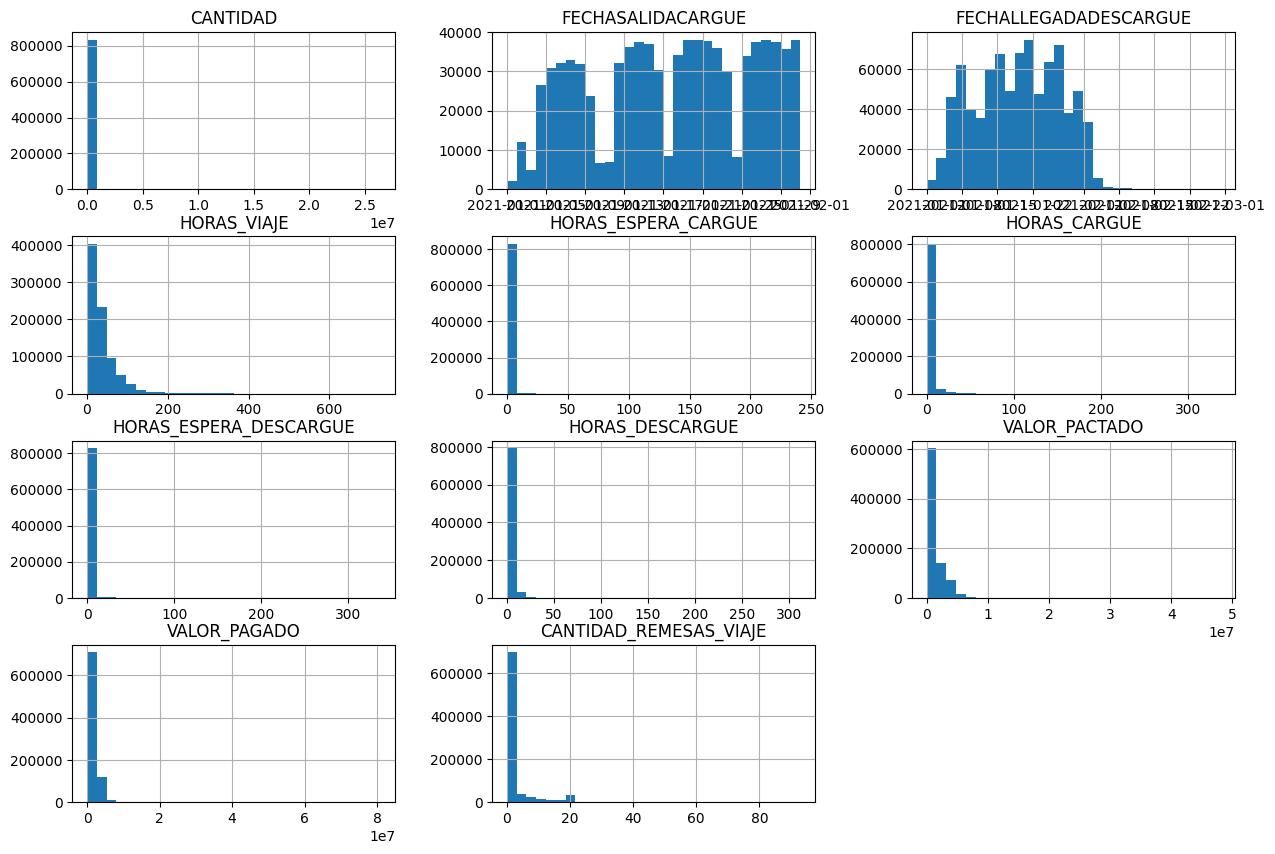

In [ ]:
df.hist(figsize=(15, 10), bins=30)

In [ ]:
variables = ['HORAS_VIAJE', 'HORAS_ESPERA_CARGUE', 'HORAS_CARGUE',
              'HORAS_ESPERA_DESCARGUE', 'HORAS_DESCARGUE',
              'VALOR_PACTADO', 'VALOR_PAGADO', 'CANTIDAD_REMESAS_VIAJE']

<Axes: >

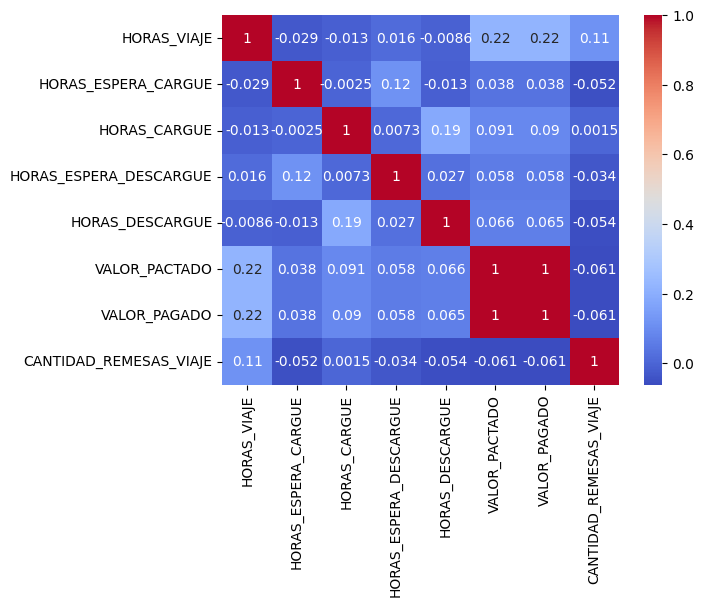

In [ ]:
sns.heatmap(df[variables].corr(), annot=True, cmap='coolwarm')

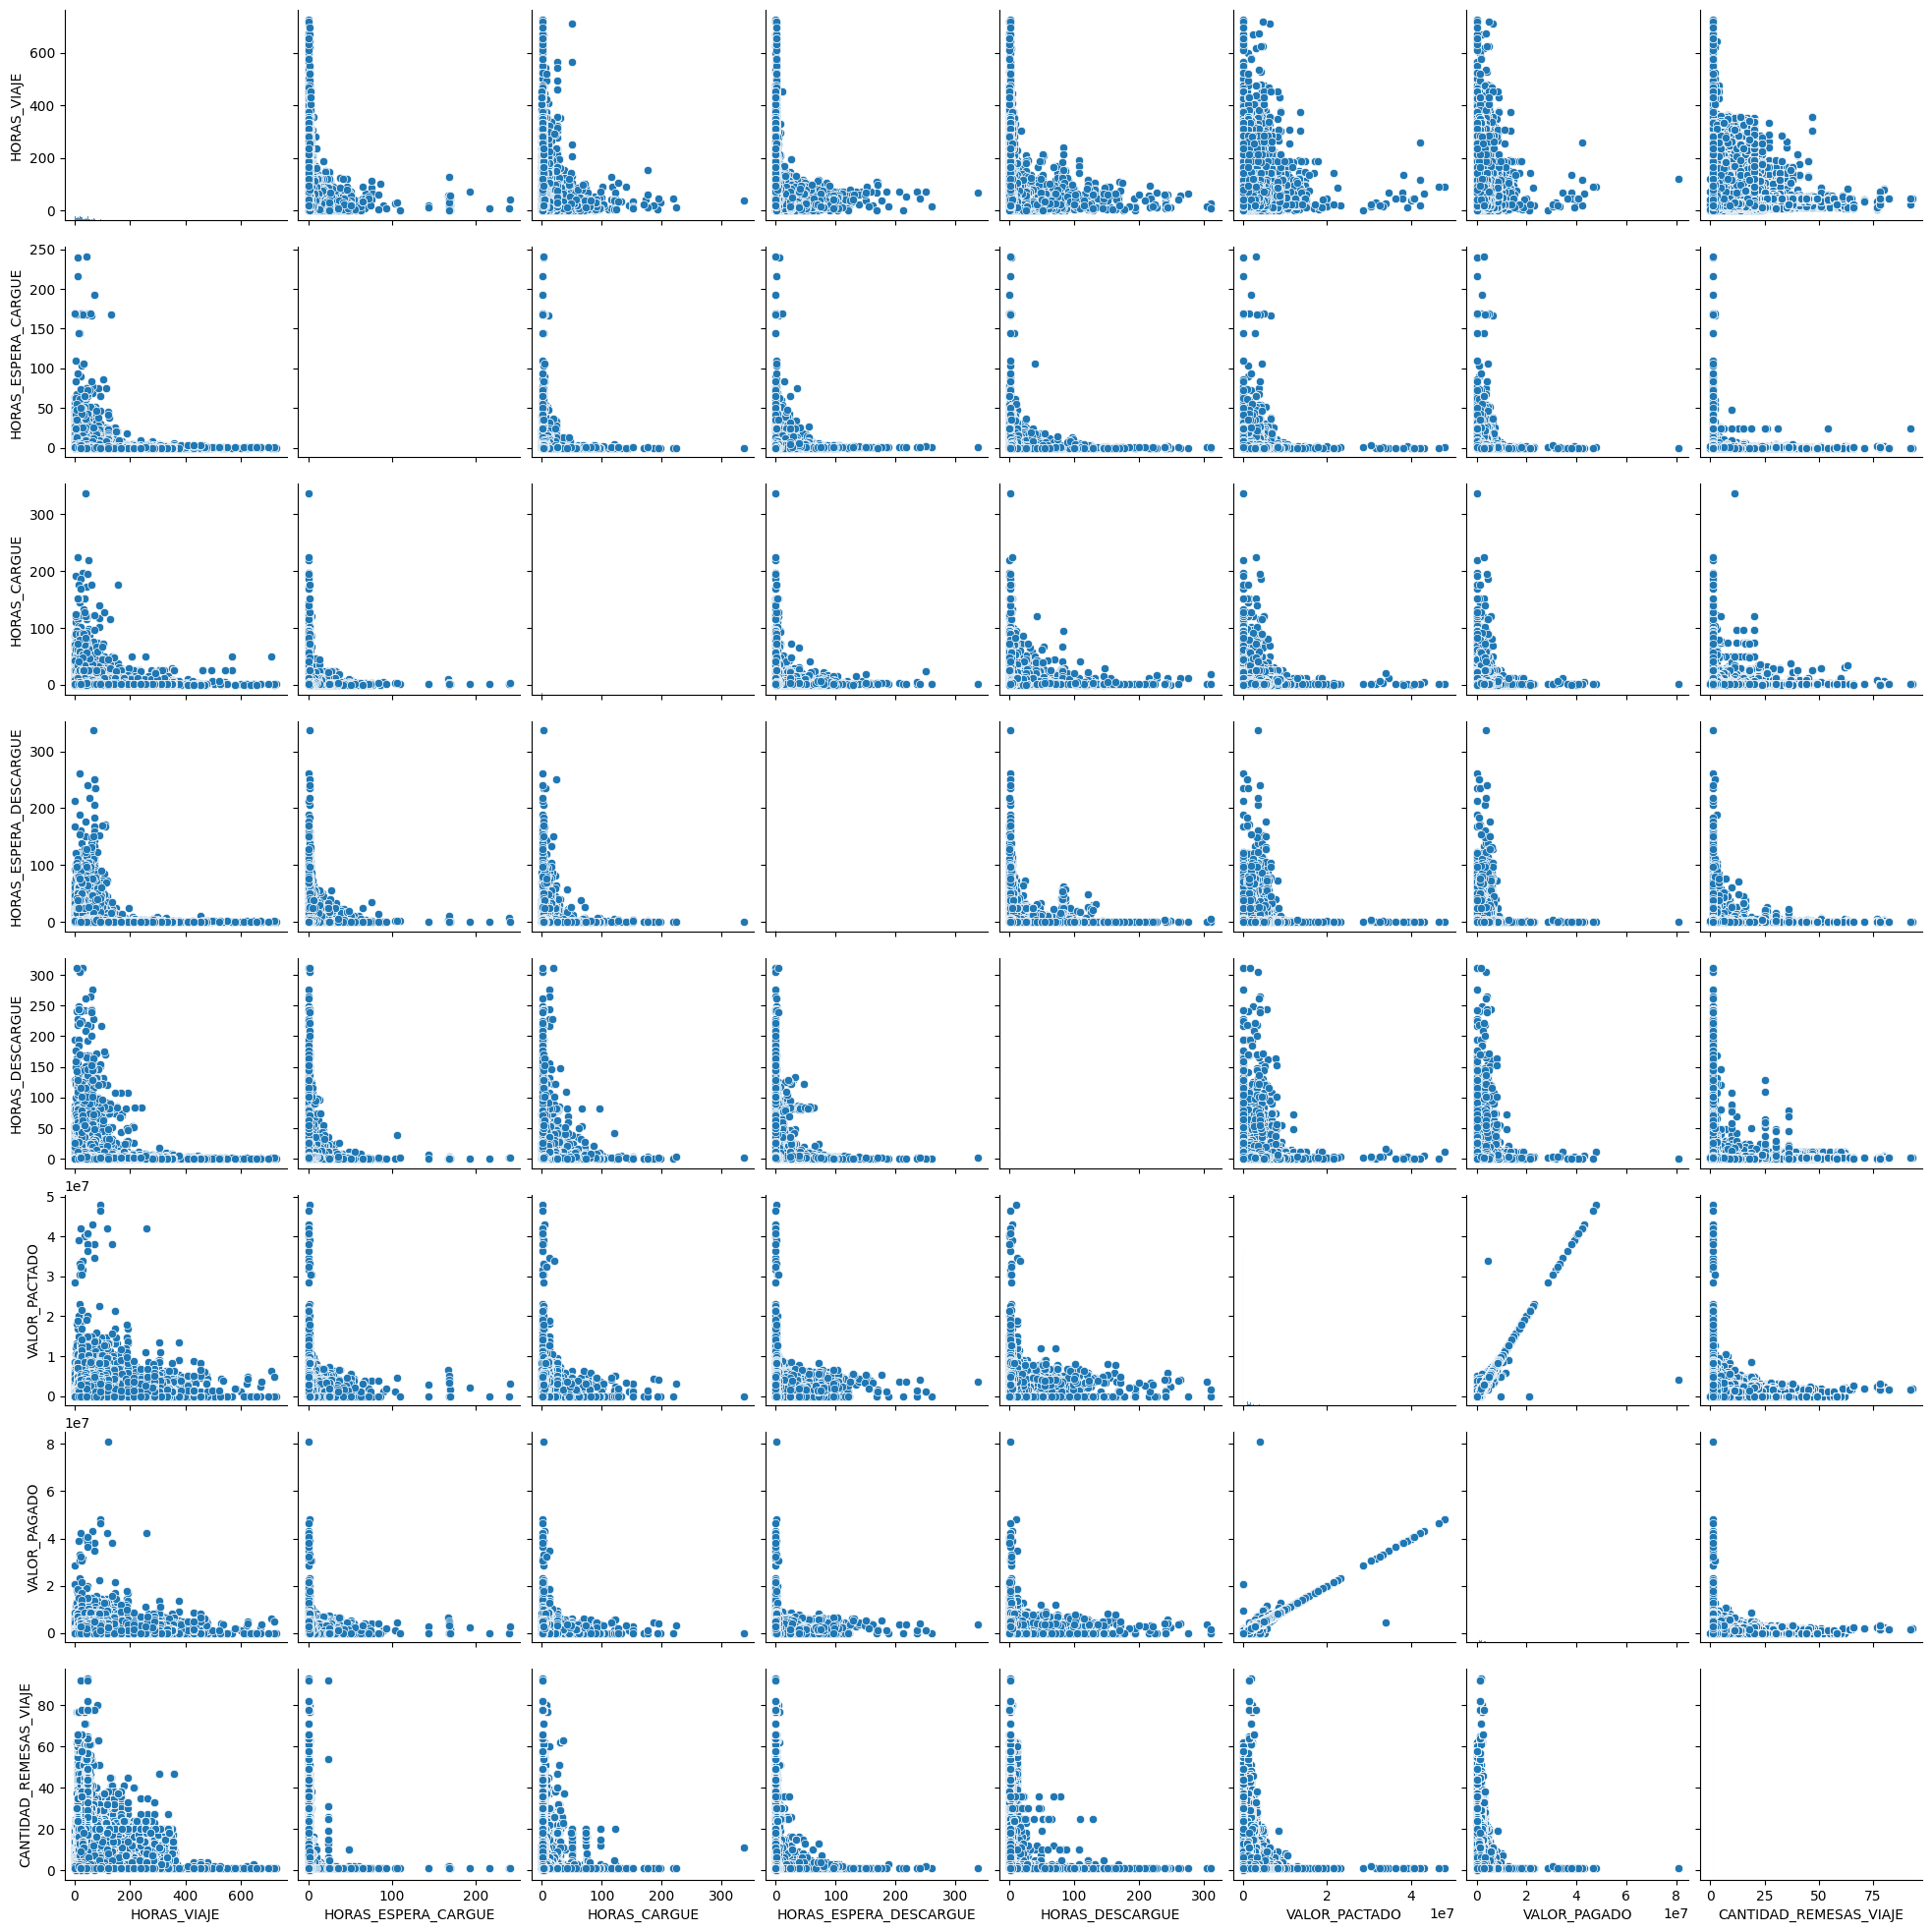

In [ ]:
sns.pairplot(df[variables])


### Boxplot per variables

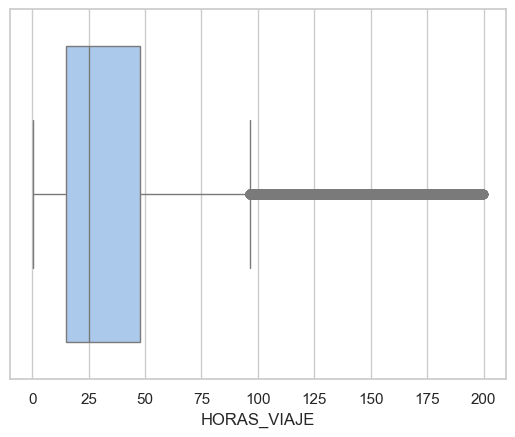

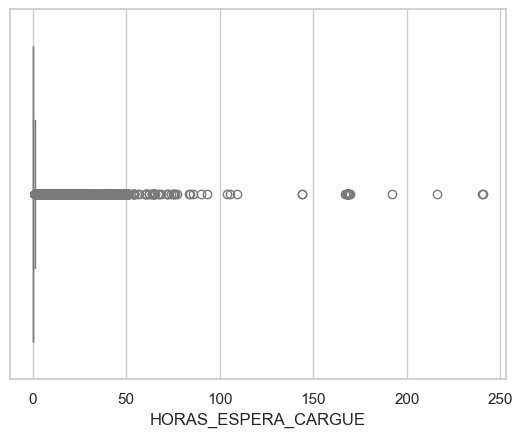

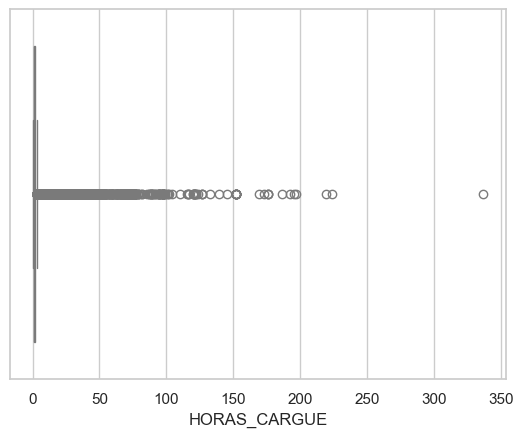

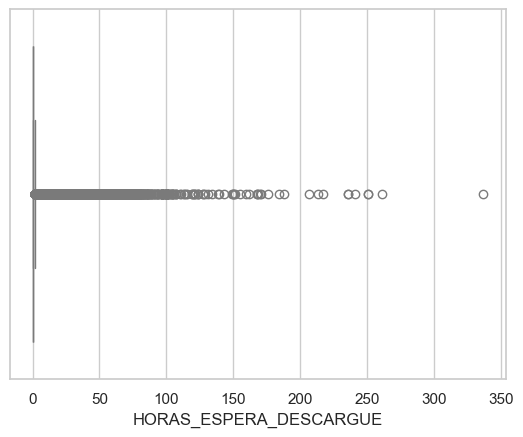

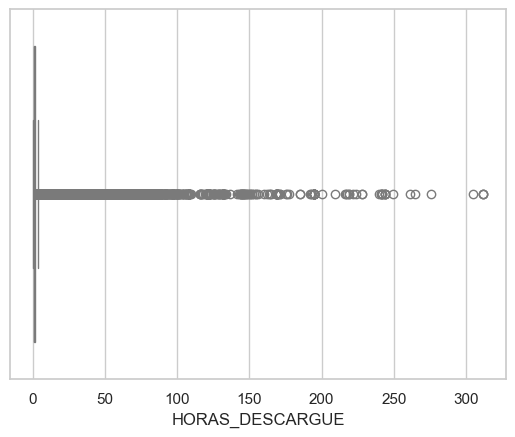

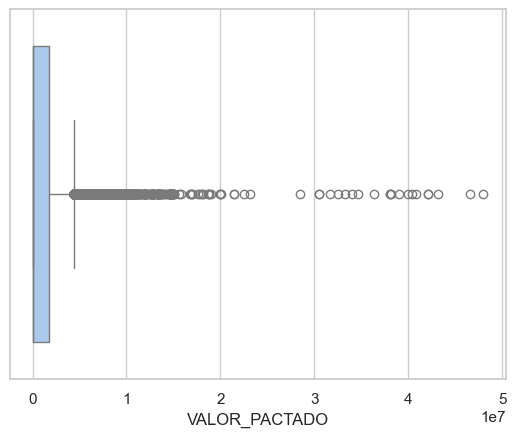

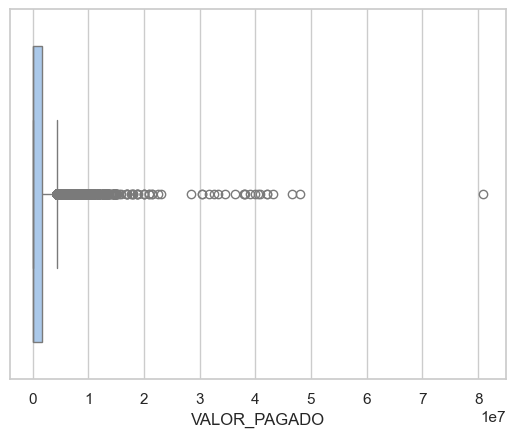

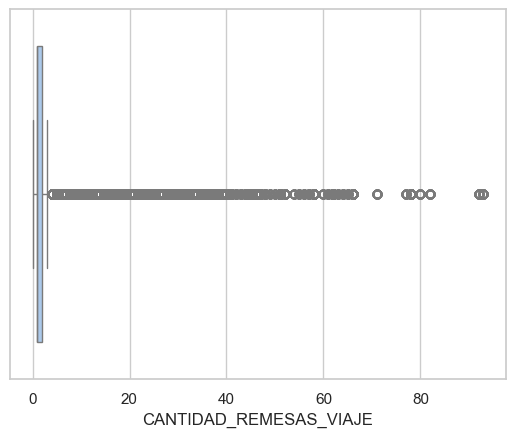

In [ ]:
## BOXPLOT por variables

for col in variables:
    sns.boxplot(x=df[col])
    plt.show()

## Cluster

### Validacion #Clusters para 4 variables

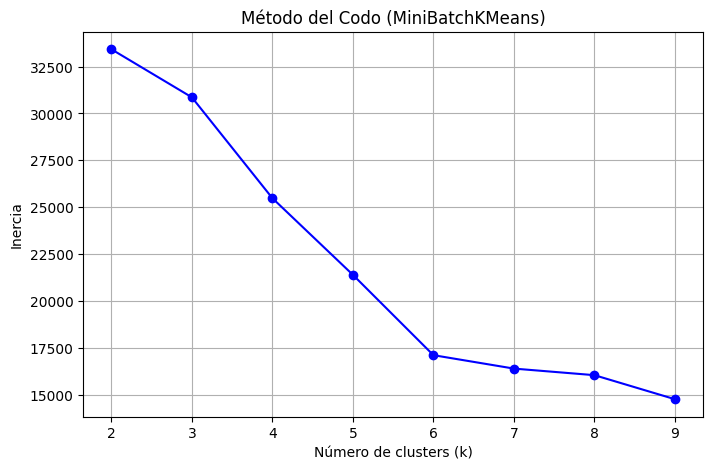

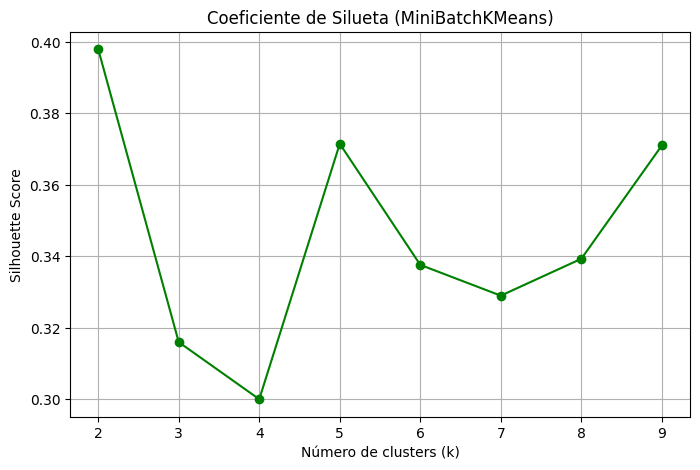

In [ ]:
X = df[['HORAS_VIAJE', 'HORAS_CARGUE', 'HORAS_DESCARGUE', 'VALOR_PAGADO']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

if len(X_scaled) > 10000:
    idx = np.random.choice(len(X_scaled), 10000, replace=False)
    X_scaled_sample = X_scaled[idx]
else:
    X_scaled_sample = X_scaled

# Metodo del codo
inertia = []
K = range(2, 10)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024)
    kmeans.fit(X_scaled_sample)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o-', color='blue')
plt.title('Método del Codo (MiniBatchKMeans)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Metodo coeficiente solueta
silhouette_scores = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024)
    labels = kmeans.fit_predict(X_scaled_sample)
    silhouette_scores.append(silhouette_score(X_scaled_sample, labels))

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, 'o-', color='green')
plt.title('Coeficiente de Silueta (MiniBatchKMeans)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### Cluster 1

In [ ]:
variables = [
    "NATURALEZA", 
    "HORAS_VIAJE", "HORAS_ESPERA_CARGUE", "HORAS_CARGUE",
    "HORAS_ESPERA_DESCARGUE", "HORAS_DESCARGUE",
    "VALOR_PAGADO", "CANTIDAD_REMESAS_VIAJE"
]
df_cluster = df[variables].copy()

#Codificacion de strings
le = LabelEncoder()
df_cluster["NATURALEZA"] = le.fit_transform(df_cluster["NATURALEZA"].astype(str))
# Estandarizacion de valores
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


# Aplicacion Kmeans
kmeans = KMeans(n_clusters=6, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

cluster_summary = df.groupby("Cluster")[[
    "HORAS_VIAJE", "HORAS_CARGUE", "HORAS_DESCARGUE", "VALOR_PAGADO"
]].mean()

print(cluster_summary)


         HORAS_VIAJE  HORAS_CARGUE  HORAS_DESCARGUE  VALOR_PAGADO
Cluster                                                          
0          69.691863      1.769758         1.896447  2.542363e+06
1          29.078557      2.206590         2.519033  1.545206e+06
2          35.177370     12.290069        14.187206  1.312687e+06
3          34.916145      2.701173         2.911940  1.835357e+06
4          50.269178      2.507299         4.026342  2.327532e+06
5          22.704396      1.442145         1.596322  3.761850e+05


### Cluster 2

Cluster
1    518163
4    151408
2    100664
0     38516
5     10922
3      7867
Name: count, dtype: int64


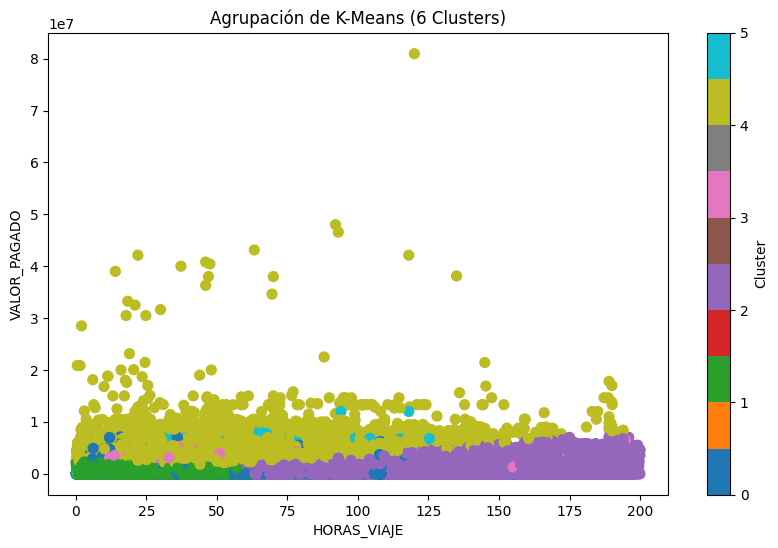

In [ ]:
columnas = ["HORAS_VIAJE", "HORAS_CARGUE", "HORAS_DESCARGUE", "VALOR_PAGADO"]
X = df[columnas]

#Estandarizacion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validacion kmeand 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
print(df["Cluster"].value_counts())

# Graph
plt.figure(figsize=(10,6))
plt.scatter(df["HORAS_VIAJE"], df["VALOR_PAGADO"], c=df["Cluster"], cmap="tab10", s=50)
plt.xlabel("HORAS_VIAJE")
plt.ylabel("VALOR_PAGADO")
plt.title("Agrupación de K-Means (6 Clusters)")
plt.colorbar(label="Cluster")
plt.show()


### Cluster 3

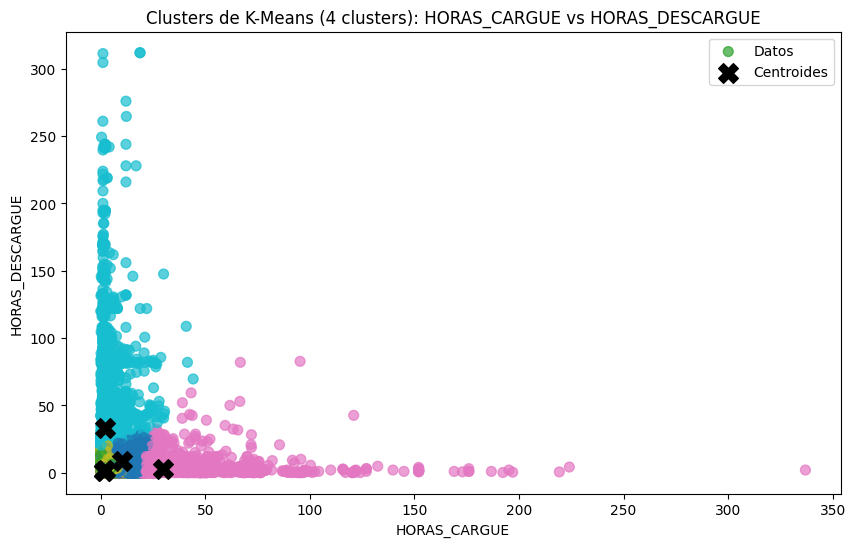

In [ ]:
# Estandarizacion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Kmeans 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df["cluster_descargue_cargue"] = kmeans.fit_predict(X_scaled)

# Centroides
centroides = scaler.inverse_transform(kmeans.cluster_centers_)

# Graph
plt.figure(figsize=(10,6))
plt.scatter(df["HORAS_CARGUE"], df["HORAS_DESCARGUE"], 
            c=df["cluster_descargue_cargue"], cmap="tab10", s=50, alpha=0.7, label="Datos")
plt.scatter(centroides[:, 1], centroides[:, 2], 
            c="black", s=200, marker="X", label="Centroides")

plt.xlabel("HORAS_CARGUE")
plt.ylabel("HORAS_DESCARGUE")
plt.title("Clusters de K-Means (4 clusters): HORAS_CARGUE vs HORAS_DESCARGUE")
plt.legend()
plt.show()



### Cluster 4

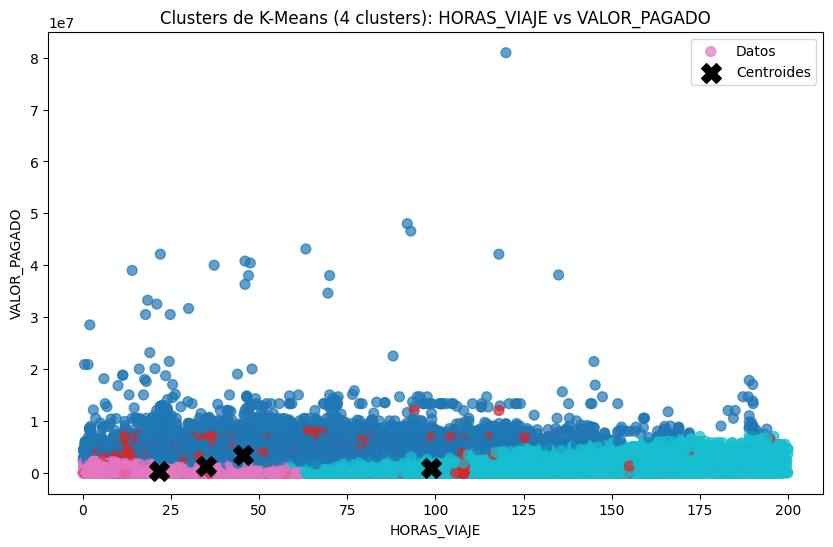

In [ ]:
# Kmeans 4 Clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster_viaje_valor"] = kmeans.fit_predict(X_scaled)

# Centroides
centroides = scaler.inverse_transform(kmeans.cluster_centers_)

# Graph
plt.figure(figsize=(10,6))
plt.scatter(df["HORAS_VIAJE"], df["VALOR_PAGADO"], 
            c=df["cluster_viaje_valor"], cmap="tab10", s=50, alpha=0.7, label="Datos")
plt.scatter(centroides[:, 0], centroides[:, 3], 
            c="black", s=200, marker="X", label="Centroides")

plt.xlabel("HORAS_VIAJE")
plt.ylabel("VALOR_PAGADO")
plt.title("Clusters de K-Means (4 clusters): HORAS_VIAJE vs VALOR_PAGADO")
plt.legend()
plt.show()


### Cluster 5

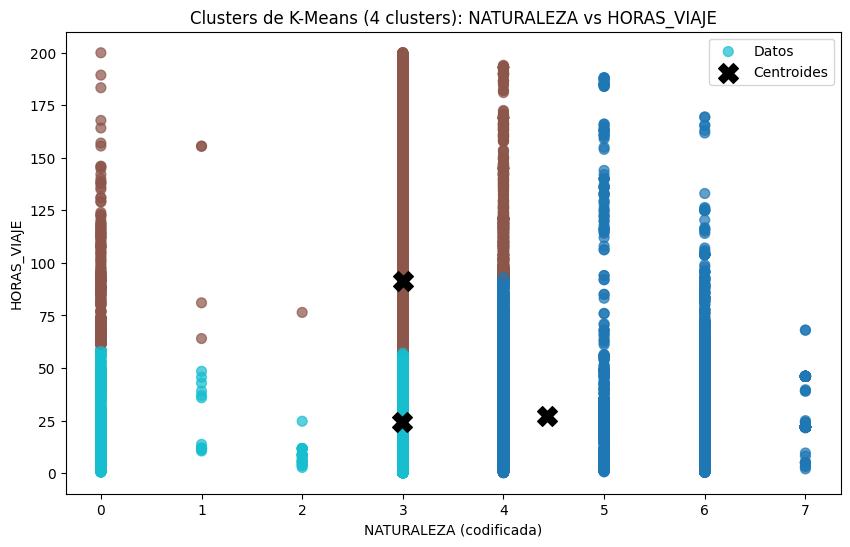

In [ ]:

df_cluster = df.copy()

# Codificacion  Naturaleza
if df_cluster["NATURALEZA"].dtype == "object":
    le = LabelEncoder()
    df_cluster["NATURALEZA_cod"] = le.fit_transform(df_cluster["NATURALEZA"])
else:
    df_cluster["NATURALEZA_cod"] = df_cluster["NATURALEZA"]

# Variables
columnas = ["NATURALEZA_cod", "HORAS_VIAJE"]
X = df_cluster[columnas]

# Estandarizacion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["cluster_naturaleza_viaje"] = kmeans.fit_predict(X_scaled)

# Centroides
centroides = scaler.inverse_transform(kmeans.cluster_centers_)

# Graph
plt.figure(figsize=(10,6))
plt.scatter(df_cluster["NATURALEZA_cod"], df_cluster["HORAS_VIAJE"], 
            c=df_cluster["cluster_naturaleza_viaje"], cmap="tab10", s=50, alpha=0.7, label="Datos")
plt.scatter(centroides[:, 0], centroides[:, 1], 
            c="black", s=200, marker="X", label="Centroides")

plt.xlabel("NATURALEZA (codificada)")
plt.ylabel("HORAS_VIAJE")
plt.title("Clusters de K-Means (4 clusters): NATURALEZA vs HORAS_VIAJE")
plt.legend()
plt.show()


### Cluster 6

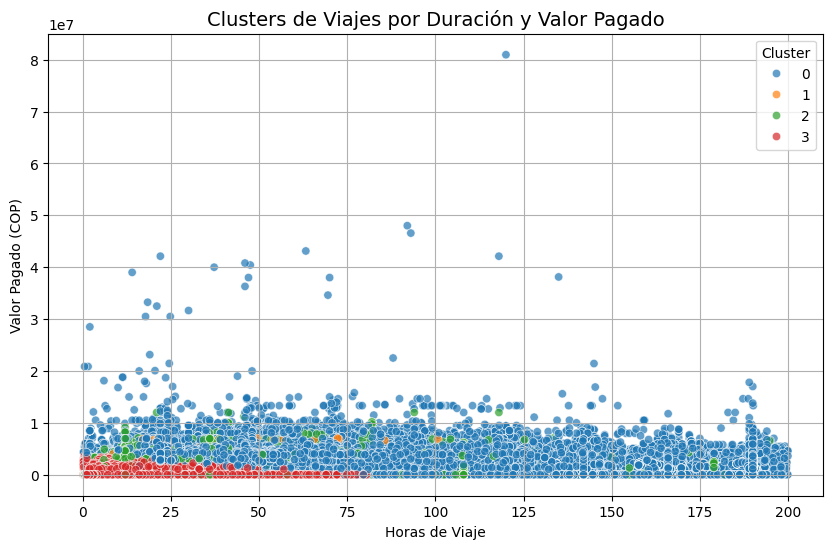

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='HORAS_VIAJE', 
    y='VALOR_PAGADO', 
    hue='Cluster', 
    palette='tab10', 
    alpha=0.7
)
plt.title('Clusters de Viajes por Duración y Valor Pagado', fontsize=14)
plt.xlabel('Horas de Viaje')
plt.ylabel('Valor Pagado (COP)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## Model

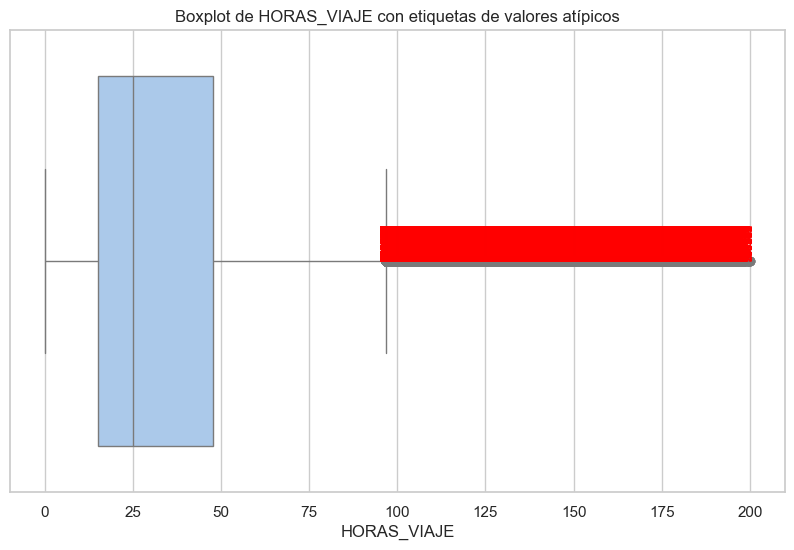

In [ ]:
## Validacion de Ouliers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df["HORAS_VIAJE"])

# Definicion de Outliers
outliers = df[df["HORAS_VIAJE"] > df["HORAS_VIAJE"].quantile(0.75) + 1.5 * (df["HORAS_VIAJE"].quantile(0.75) - df["HORAS_VIAJE"].quantile(0.25))]
for i in range(outliers.shape[0]):
    ax.text(outliers["HORAS_VIAJE"].iloc[i], 0, str(outliers.index[i]), 
            ha='center', va='bottom', fontsize=8, rotation=90, color='red')

plt.title("Boxplot de HORAS_VIAJE con etiquetas de valores atípicos")
plt.xlabel("HORAS_VIAJE")
plt.show()

In [ ]:
df_outliers["HORAS_VIAJE"].describe()


count    7695.000000
mean      276.104746
std        58.177573
min       200.170000
25%       229.000000
50%       267.650000
75%       317.875000
max       727.000000
Name: HORAS_VIAJE, dtype: float64

In [ ]:
df_outliers[["CARGUE", "DESCARGUE", "HORAS_VIAJE"]].value_counts().head(10)

CARGUE                             DESCARGUE                          HORAS_VIAJE
BUENAVENTURA VALLE DEL CAUCA       PALMASECA PALMIRA VALLE DEL CAUCA  302.00         116
VILLA RICA CAUCA                   YUMBO VALLE DEL CAUCA              335.00          42
FUNZA CUNDINAMARCA                 BARRANQUILLA ATLANTICO             337.13          20
MEDELLIN ANTIOQUIA                 BOGOTA BOGOTA D. C.                302.87          20
BOGOTA BOGOTA D. C.                CALI VALLE DEL CAUCA               207.45          20
                                   MEDELLIN ANTIOQUIA                 205.72          20
MEDELLIN ANTIOQUIA                 BOGOTA BOGOTA D. C.                256.12          20
BARRANQUILLA ATLANTICO             MEDELLIN ANTIOQUIA                 326.23          20
LA ESTRELLA GOMEZ PLATA ANTIOQUIA  BOGOTA BOGOTA D. C.                209.13          20
BOGOTA BOGOTA D. C.                MEDELLIN ANTIOQUIA                 204.43          20
Name: count, dtype: int64

In [ ]:
df['trayecto'] = (
    df['FECHASALIDACARGUE'].astype(str) + '_' +
    df['CODIGO_CARGUE'].astype(str) + '_' +
    df['CODIGO_DESCARGUE'].astype(str) + '_' +
    df['CONDUCTOR'].astype(str)
)

In [ ]:
# Deteccion de viajes por lote se define cantidad real de trayectos
df['Viaje'] = df['CODIGO_CARGUE'].astype(str) + '-' + df['CODIGO_DESCARGUE'].astype(str)

In [ ]:
# Definicion tiempos y clases
df_viaje["TIEMPO_TOTAL"] = df_viaje["HORAS_VIAJE"] + df_viaje["HORAS_ESPERA_CARGUE"] + df_viaje["HORAS_CARGUE"] + df_viaje["HORAS_ESPERA_DESCARGUE"] + df_viaje["HORAS_DESCARGUE"]

# Umbral y etiqueta
umbral_demora = df_viaje["TIEMPO_TOTAL"].quantile(0.75)
df_viaje["CLASE_VIAJE"] = df_viaje["TIEMPO_TOTAL"].apply(lambda x: "Demorado" if x > umbral_demora else "Ideal")


In [ ]:
df_viaje = df_viaje[[
    'NATURALEZA',
    'HORA_SALIDA_CARGUE',
    'HORA_LLEGADA_DESCARGUE',
    'HORAS_VIAJE',
    'HORAS_ESPERA_CARGUE',
    'HORAS_CARGUE',
    'HORAS_ESPERA_DESCARGUE',
    'HORAS_DESCARGUE',
    'CANTIDAD_REMESAS_VIAJE',
    'EMPRESA_TRANSPORTE',
    'CONDUCTOR',
    'Viaje',
    'TIEMPO_TOTAL',
    'CLASE_VIAJE'
]]

C:\Users\pandr\AppData\Local\Temp\ipykernel_11876\3295289401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viaje, x='CLASE_VIAJE', y='TIEMPO_TOTAL', palette='Set2')


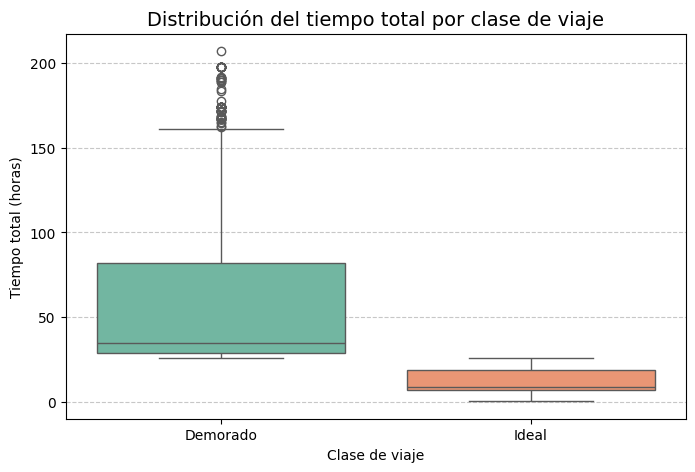

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(data=df_viaje, x='CLASE_VIAJE', y='TIEMPO_TOTAL', palette='Set2')
plt.title('Distribución del tiempo total por clase de viaje', fontsize=14)
plt.xlabel('Clase de viaje')
plt.ylabel('Tiempo total (horas)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import pandas as pd

def hora_a_decimal(hora):
    if pd.isna(hora):
        return None
    if isinstance(hora, str):
        try:
            h, m, s = map(int, hora.split(':'))
            return h + m/60 + s/3600
        except:
            return None
    else:
        return hora.hour + hora.minute/60 + hora.second/3600

df_viaje['HORA_SALIDA_CARGUE'] = df_viaje['HORA_SALIDA_CARGUE'].apply(hora_a_decimal)
df_viaje['HORA_LLEGADA_DESCARGUE'] = df_viaje['HORA_LLEGADA_DESCARGUE'].apply(hora_a_decimal)


C:\Users\pandr\AppData\Local\Temp\ipykernel_9900\1735479211.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viaje['HORA_SALIDA_CARGUE'] = df_viaje['HORA_SALIDA_CARGUE'].apply(hora_a_decimal)
C:\Users\pandr\AppData\Local\Temp\ipykernel_9900\1735479211.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viaje['HORA_LLEGADA_DESCARGUE'] = df_viaje['HORA_LLEGADA_DESCARGUE'].apply(hora_a_decimal)


In [ ]:
## Entrenamiento 80/20. Se puede definir otro rango 
from sklearn.model_selection import train_test_split
X = df_viaje[['NATURALEZA', 'HORA_SALIDA_CARGUE', 'CANTIDAD_REMESAS_VIAJE', 'EMPRESA_TRANSPORTE']]
y = df_viaje['CLASE_VIAJE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Columnas categóricas
cat_cols = ['NATURALEZA', 'EMPRESA_TRANSPORTE']
num_cols = ['HORA_SALIDA_CARGUE', 'CANTIDAD_REMESAS_VIAJE']

# Pipeline de preprocesamiento + modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['NATURALEZA',
                                                   'EMPRESA_TRANSPORTE'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    Demorado       0.92      0.91      0.91       652
       Ideal       0.97      0.97      0.97      1999

    accuracy                           0.96      2651
   macro avg       0.94      0.94      0.94      2651
weighted avg       0.96      0.96      0.96      2651

[[ 593   59]
 [  54 1945]]


In [ ]:
joblib.dump(model, "modelo_entrenado.pkl")

print("✅ Modelo guardado correctamente como modelo_entrenado.pkl")


✅ Modelo guardado correctamente como modelo_entrenado.pkl
